In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('seattle-weather.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,01-02-2012,10.9,10.6,2.8,4.5,rain
2,01-03-2012,0.8,11.7,7.2,2.3,rain
3,01-04-2012,20.3,12.2,5.6,4.7,rain
4,01-05-2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-2015,8.6,4.4,1.7,2.9,rain
1457,28-12-2015,1.5,5.0,1.7,1.3,rain
1458,29-12-2015,0.0,7.2,0.6,2.6,fog
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun


In [3]:
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
data['date'] = pd.to_datetime(data['date'])

C:\Users\HP\AppData\Local\Temp\ipykernel_16240\736794659.py:1: UserWarning: Parsing '13-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16240\736794659.py:1: UserWarning: Parsing '14-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16240\736794659.py:1: UserWarning: Parsing '15-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\HP\AppData\Local\Temp\ipykernel_16240\736794659.py:1: UserWarning: Parsing '16-01-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date'] = pd.to_datetime(data['date'])
C:\Users\HP\AppData\Local\Temp\i

In [7]:
data.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [8]:
data.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
1371,2015-10-03,0.0,19.4,11.1,4.8,sun
1239,2015-05-24,0.0,17.8,11.1,2.7,sun
1178,2015-03-24,7.6,12.8,6.1,3.9,rain
203,2012-07-22,1.0,20.6,12.2,3.9,rain
1195,2015-04-10,10.9,13.9,7.8,4.6,rain
581,2013-08-04,0.0,28.9,15.0,3.4,sun
1289,2015-07-13,0.0,25.6,16.1,3.1,sun
752,2014-01-22,0.5,9.4,5.6,2.6,rain
257,2012-09-14,0.0,26.1,11.1,1.5,sun
409,2013-02-13,2.3,9.4,7.2,4.1,rain


In [9]:
data.shape

(1461, 6)

In [10]:
data.drop(["date"],axis=1,inplace=True)

In [11]:
data.shape

(1461, 5)

In [12]:
data.nunique()

precipitation    111
temp_max          67
temp_min          55
wind              79
weather            5
dtype: int64

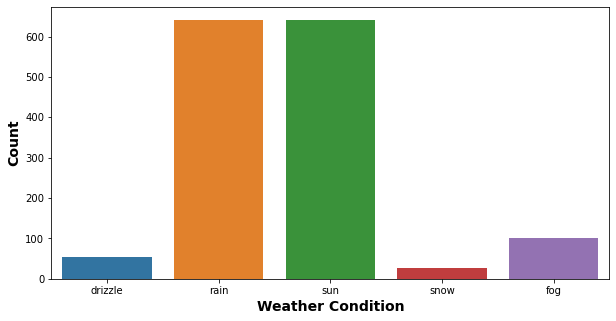

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'weather',data = data)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

In [14]:
classes={
        'drizzle':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'sun':4
}

In [15]:
data['weather']=data['weather'].astype('category')
data['weather']=data['weather'].cat.codes

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
x = data.drop('weather',axis=1)
y = data['weather']

In [18]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [19]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int8

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [21]:
print("*"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("*"*40)
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("*"*40)

****************************************
Shape of x training data :  (1095, 4)
Shape of y training data :  (1095,)
****************************************
Shape of x testing data :  (366, 4)
Shape of y testing data :  (366,)
****************************************


In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [23]:
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train, y_train,sample_weight=None)

GaussianNB()

In [24]:
y_predict=classifier_gnb.predict(x_test)

In [25]:
print(accuracy_score(y_test,y_predict))

0.8360655737704918


In [26]:
cm = confusion_matrix(y_test, y_predict)

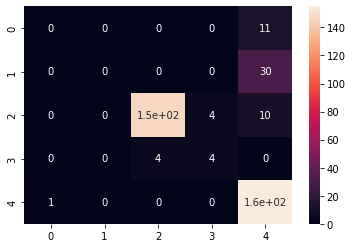

In [27]:
sns.heatmap(cm,annot=True)
plt.savefig('confusion.png')

In [28]:
import pickle
pickle_out = open("gn2.pkl","wb")
pickle.dump(classifier_gnb, pickle_out)
pickle_out.close()